In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as stats

In [2]:
data = pd.read_csv("C:/assign/clinvar_conflicting.csv")

C:\Users\Ashley\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,955563,G,C,0.0000,0.00000,0.0000,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,11.390,1.133255,-2.0
1,1,955597,G,T,0.0000,0.42418,0.2826,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,8.150,0.599088,NaN
2,1,955619,G,C,0.0000,0.03475,0.0088,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,3.288,0.069819,1.0
3,1,957640,C,T,0.0318,0.02016,0.0328,"MedGen:C3808739,OMIM:615120|MedGen:CN169374",NaN,"Myasthenic_syndrome,_congenital,_8|not_specified",...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,12.560,1.356499,NaN
4,1,976059,C,T,0.0000,0.00022,0.0010,MedGen:CN169374,NaN,not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,0.421,17.740,2.234711,NaN


In [4]:
data.tail()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
65183,MT,11778,G,A,0.0,0.0,0.0,"Human_Phenotype_Ontology:HP:0001112,MedGen:C09...",NaN,Leber's_optic_atrophy|not_specified|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.400,4.556305,NaN
65184,MT,12811,T,C,0.0,0.0,0.0,"Human_Phenotype_Ontology:HP:0001112,MedGen:C09...",NaN,Leber's_optic_atrophy|not_specified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.016,0.043467,NaN
65185,MT,15470,T,C,0.0,0.0,0.0,"MedGen:C0346153,OMIM:114480,Orphanet:ORPHA2275...",NaN,Familial_cancer_of_breast|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.860,0.027997,NaN
65186,MT,15511,T,C,0.0,0.0,0.0,"Gene:6765,Human_Phenotype_Ontology:HP:0100615,...",NaN,Neoplasm_of_ovary|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.081,-0.055831,NaN
65187,MT,15923,A,G,0.0,0.0,0.0,".|Human_Phenotype_Ontology:HP:0000952,MedGen:C...",NaN,Variant_of_unknown_significance|Jaundice|Gener...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.734,0.844303,NaN


In [5]:
print(data['CLASS'].value_counts())

0    48754
1    16434
Name: CLASS, dtype: int64


In [6]:
## DATA CLEANING 
#Find Total Missing Values  
missingvalue = data.isnull().sum() 
missingvalue

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65112
CLNDN                     0
CLNDNINCL             65112
CLNHGVS                   0
CLNSIGINCL            65112
CLNVC                     0
CLNVI                 37529
MC                     6969
ORIGIN                 6123
SSR                   65084
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [7]:
#Find the percentage of missing value 
percentmissvalue = 100*data.isnull().sum()/len(data)
percentmissvalue 

CHROM                  0.000000
POS                    0.000000
REF                    0.000000
ALT                    0.000000
AF_ESP                 0.000000
AF_EXAC                0.000000
AF_TGP                 0.000000
CLNDISDB               0.000000
CLNDISDBINCL          99.883414
CLNDN                  0.000000
CLNDNINCL             99.883414
CLNHGVS                0.000000
CLNSIGINCL            99.883414
CLNVC                  0.000000
CLNVI                 57.570412
MC                    10.690618
ORIGIN                 9.392833
SSR                   99.840461
CLASS                  0.000000
Allele                 0.000000
Consequence            0.000000
IMPACT                 0.000000
SYMBOL                 0.024544
Feature_type           0.021476
Feature                0.021476
BIOTYPE                0.024544
EXON                  13.642081
INTRON                86.495981
cDNA_position         13.628275
CDS_position          15.271216
Protein_position      15.271216
Amino_ac

In [8]:
#create a table and enter both the values missingvalue,percentmissvalue.
missingvaluetable = pd.concat([missingvalue, percentmissvalue], axis=1)

#rename column 0 and 1 with table name. 
missingvaluetablecolumn = missingvaluetable.rename(columns={0 : 'missingvalues', 1: '%missingvalues'})

#display only columns that has missing values.
missingvaluetablecolumn = missingvaluetablecolumn[missingvaluetablecolumn.iloc[:,1] != 0]

#sorting values with highest missing values
missingvaluetablecolumn = missingvaluetablecolumn.sort_values(by=['missingvalues','%missingvalues'],ascending=False).round(1)

#summary of dataframe that has missing values.
print ("Dataframe has " + str(data.shape[1]) + " columns.\n"
"There are " + str(missingvaluetablecolumn.shape[0]) +" columns that have missing values.")
missingvaluetablecolumn

Dataframe has 46 columns.
There are 31 columns that have missing values.


,missingvalues,%missingvalues
MOTIF_NAME,65186,100.0
MOTIF_POS,65186,100.0
HIGH_INF_POS,65186,100.0
MOTIF_SCORE_CHANGE,65186,100.0
CLNDISDBINCL,65112,99.9
CLNDNINCL,65112,99.9
CLNSIGINCL,65112,99.9
SSR,65084,99.8
DISTANCE,65080,99.8
INTRON,56385,86.5


In [9]:
#eliminate attributes with less significance and 100% missing value
data.drop(['MOTIF_NAME','MOTIF_POS','MOTIF_SCORE_CHANGE','HIGH_INF_POS','CLNDISDBINCL',
          'CLNDNINCL','CLNSIGINCL','DISTANCE','SSR','CLNDISDB','CLNVI'],axis=1,inplace = True)

In [10]:
len(data.columns)

35

In [11]:
##EXPLORATORY DATA ANALYSIS 
#total count of attributes with similar datatypes 
data.dtypes.value_counts()

object     24
float64     9
int64       2
dtype: int64

In [12]:
data.describe()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,STRAND,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
count,6.518800e+04,65188.000000,65188.000000,65188.000000,59065.000000,65188.000000,65174.000000,60975.000000,64096.000000,64096.000000,25593.000000
mean,7.757594e+07,0.014511,0.014492,0.015263,1.272869,0.252102,-0.006659,0.345058,15.685616,2.554131,-0.402258
std,5.974051e+07,0.057795,0.059542,0.059527,5.343258,0.434223,0.999985,0.361238,10.836350,2.961553,1.872684
min,9.610000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000069,0.001000,-5.477391,-3.000000
25%,3.254179e+07,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.024300,7.141000,0.462951,-2.000000
50%,5.797021e+07,0.000000,0.000040,0.000000,1.000000,0.000000,-1.000000,0.157000,14.090000,1.642948,-1.000000
75%,1.127454e+08,0.001200,0.001230,0.001600,1.000000,1.000000,1.000000,0.710000,24.100000,4.381392,1.000000
max,2.476080e+08,0.499000,0.499890,0.499800,513.000000,1.000000,1.000000,1.000000,99.000000,46.556261,3.000000


In [13]:
#datatype of each attribute
data.dtypes

CHROM                object
POS                   int64
REF                  object
ALT                  object
AF_ESP              float64
AF_EXAC             float64
AF_TGP              float64
CLNDN                object
CLNHGVS              object
CLNVC                object
MC                   object
ORIGIN              float64
CLASS                 int64
Allele               object
Consequence          object
IMPACT               object
SYMBOL               object
Feature_type         object
Feature              object
BIOTYPE              object
EXON                 object
INTRON               object
cDNA_position        object
CDS_position         object
Protein_position     object
Amino_acids          object
Codons               object
STRAND              float64
BAM_EDIT             object
SIFT                 object
PolyPhen             object
LoFtool             float64
CADD_PHRED          float64
CADD_RAW            float64
BLOSUM62            float64
dtype: object

In [14]:
# Let's inspect the number of unique labels for the different variables

for feat in data.select_dtypes('int64'):
    print('Number of int datatype in variable %s:  {}'.format(
    len(data[feat].unique()))%feat)

Number of int datatype in variable POS:  63115
Number of int datatype in variable CLASS:  2


In [15]:
for feat in data.select_dtypes('object'):
    print('Number of object datatype in variable %s:  {}'.format(
    len(data[feat].unique()))%feat)

Number of object datatype in variable CHROM:  25
Number of object datatype in variable REF:  866
Number of object datatype in variable ALT:  458
Number of object datatype in variable CLNDN:  9260
Number of object datatype in variable CLNHGVS:  65188
Number of object datatype in variable CLNVC:  7
Number of object datatype in variable MC:  90
Number of object datatype in variable Allele:  374
Number of object datatype in variable Consequence:  48
Number of object datatype in variable IMPACT:  4
Number of object datatype in variable SYMBOL:  2329
Number of object datatype in variable Feature_type:  3
Number of object datatype in variable Feature:  2370
Number of object datatype in variable BIOTYPE:  3
Number of object datatype in variable EXON:  3265
Number of object datatype in variable INTRON:  1930
Number of object datatype in variable cDNA_position:  13971
Number of object datatype in variable CDS_position:  13664
Number of object datatype in variable Protein_position:  7340
Number o

In [16]:
for feat in data.select_dtypes('float'):
    print('Number of float datatype in variable %s:  {}'.format(
    len(data[feat].unique()))%feat)

Number of float datatype in variable AF_ESP:  2842
Number of float datatype in variable AF_EXAC:  6667
Number of float datatype in variable AF_TGP:  2087
Number of float datatype in variable ORIGIN:  28
Number of float datatype in variable STRAND:  3
Number of float datatype in variable LoFtool:  1196
Number of float datatype in variable CADD_PHRED:  9325
Number of float datatype in variable CADD_RAW:  63804
Number of float datatype in variable BLOSUM62:  7


In [17]:
#CHROM 
from sklearn.base import BaseEstimator, TransformerMixin
class Chromosome(BaseEstimator, TransformerMixin):
 def __init__(self):
   self.comment = 'Converting CHROM feature to a numerical. X=23, MT=24'
 def fit(self, X, y=None):
               return self
 def transform(self, X, y=None):
        Xcopy = X.copy()
        Xcopy.loc[:, 'CHROM'].replace('X', 23, inplace=True)
        Xcopy.loc[:, 'CHROM'].replace('MT', 24, inplace=True)
        Xcopy.loc[:, 'CHROM'] = Xcopy.CHROM.astype('int64')
        return Xcopy

In [18]:
##REF,ALT,Allele
import numpy as np
import functools
def conjunction(*conditions):
    return functools.reduce(np.logical_and, conditions)

class AlleleLength(BaseEstimator, TransformerMixin):
 def __init__(self):
        self.comment = 'Calculating the length of REF, ALT, Allele features and determine SNV,insertion and deletion'
 def fit(self, X, y=None):
        return self
 def transform(self, X, y=None):
        Xcopy = X.copy()
        Xcopy.loc[:, 'REF_len'] = Xcopy.REF.str.len()
        Xcopy.loc[:, 'ALT_len'] = Xcopy.ALT.str.len()
        Xcopy.loc[:, 'Allele_len'] = Xcopy.Allele.str.len()
        
        ref_1 = Xcopy.REF.str.len() == 1
        alt_1 = Xcopy.ALT.str.len() == 1

        Xcopy.loc[conjunction(ref_1, alt_1), 'SNV'] = 1
        Xcopy.SNV.fillna(0, inplace=True)
          
        return Xcopy

In [19]:
#cDNA_position,CDS_position,Protein_position
class Positions(BaseEstimator, TransformerMixin):
 def __init__(self):
        self.comment = 'Extract start and stop positions for cDNA_position, CDS_position, Protein_position'
 def fit(self, X, y=None):
        return self
 def transform(self, X, y=None):
        Xcopy = X.copy()
        Xcopy['cDNA_start'] = Xcopy.cDNA_position.str.split('-').str.get(0)
        Xcopy['CDS_start'] = Xcopy.CDS_position.str.split('-').str.get(0)
        Xcopy['Protein_start'] = Xcopy.Protein_position.str.split('-').str.get(0)
        
        Xcopy['cDNA_start'].replace('?', np.NaN, inplace=True)
        Xcopy['CDS_start'].replace('?', np.NaN, inplace=True)
        Xcopy['Protein_start'].replace('?', np.NaN, inplace=True)
        
        Xcopy['cDNA_start'] = Xcopy['cDNA_start'].astype(float)
        Xcopy['CDS_start'] = Xcopy['CDS_start'].astype(float)
        Xcopy['Protein_start'] = Xcopy['Protein_start'].astype(float)
        
        Xcopy['cDNA_stop'] = Xcopy.cDNA_position.str.split('-').str.get(1)
        Xcopy['CDS_stop'] = Xcopy.CDS_position.str.split('-').str.get(1)
        Xcopy['Protein_stop'] = Xcopy.Protein_position.str.split('-').str.get(1)
        
        
        Xcopy['cDNA_stop'].replace('?', np.NaN, inplace=True)
        Xcopy['CDS_stop'].replace('?', np.NaN, inplace=True)
        Xcopy['Protein_stop'].replace('?', np.NaN, inplace=True)
        
        Xcopy['cDNA_stop'] = Xcopy['cDNA_stop'].astype(float)
        Xcopy['CDS_stop'] = Xcopy['CDS_stop'].astype(float)
        Xcopy['Protein_stop'] = Xcopy['Protein_stop'].astype(float)
        
        for field in ['cDNA', 'CDS', 'Protein']: 
            start_pos_exists = Xcopy[field + '_start'].notnull()
            stop_pos_notexist = Xcopy[field + '_stop'].isnull()
            conjun = conjunction(start_pos_exists, stop_pos_notexist)
            Xcopy.loc[conjun, field + '_stop'] = Xcopy.loc[conjun, field + '_start']

        for field in ['cDNA', 'CDS', 'Protein']:            
            start_pos_notexist = Xcopy[field + '_start'].isnull()
            stop_pos_exists = Xcopy[field + '_stop'].notnull()
            conjun = conjunction(start_pos_notexist, stop_pos_exists)
            Xcopy.loc[conjun, field + '_start'] = Xcopy.loc[conjun, field + '_stop']

        for field in ['cDNA', 'CDS', 'Protein']:            
            start_pos_notexist = Xcopy[field + '_start'].isnull()
            stop_pos_notexist = Xcopy[field + '_stop'].isnull()
            conjun = conjunction(start_pos_notexist, stop_pos_notexist)
            Xcopy.loc[conjun, field + '_start'] = 0
            Xcopy.loc[conjun, field + '_stop'] = 0
            return Xcopy

In [20]:
#INTRON AND EXON
class MarkIntronsAndExons(BaseEstimator, TransformerMixin):
 def __init__(self):
        self.comment = 'Mark intron and exon variants'
 def fit(self, X, y=None):
        return self
 def transform(self, X, y=None):
        Xcopy = X.copy()

        Xcopy['Exon'] = Xcopy.EXON.notnull().astype('int64')
        Xcopy['Intron'] = Xcopy.INTRON.notnull().astype('int64')

        return Xcopy

In [21]:
#CLNDN
def disjunction(*conditions):
     return functools.reduce(np.logical_or, conditions)

class MarkNotSpecifiedCLNDN(BaseEstimator, TransformerMixin):
 def __init__(self):
        self.comment = 'Create binary indicator for CLNDN: not-specified vs. rest'
 def fit(self, X, y=None):
        return self
 def transform(self, X, y=None):
        Xcopy = X.copy()
        c1 = Xcopy.CLNDN == "not_specified"
        c2 = Xcopy.CLNDN == "not_specified|not_provided"
        c3 = Xcopy.CLNDN == "not_provided|not_specified"
        c4 = Xcopy.CLNDN == "not_provided"

        Xcopy.loc[disjunction(c1, c2, c3, c4), 'CLNDN_notspecified'] = 1
        Xcopy.CLNDN_notspecified.fillna(0, inplace=True)

        return Xcopy

In [22]:
#EXON length and position
class ExtractEXONPositionAndLength(BaseEstimator, TransformerMixin):
 def __init__(self):
        self.comment = 'Extract the position and length of EXON'
 def fit(self, X, y=None):
        return self
 def transform(self, X, y=None):
        Xcopy = X.copy()

        ### Position
        Xcopy['EXON_pos'] = Xcopy.EXON.str.split('/').str.get(0)
        Xcopy['EXON_pos'] = Xcopy['EXON_pos'].astype(float)
        
        ### Length
        Xcopy['EXON_len'] = Xcopy.EXON.str.split('/').str.get(1)
        Xcopy['EXON_len'] = Xcopy['EXON_len'].astype(float)
        exon_pos_notexist = Xcopy["EXON_pos"].isnull()
        exon_length_notexist = Xcopy["EXON_len"].isnull()
        conjun = conjunction(exon_pos_notexist, exon_length_notexist)
        Xcopy.loc[conjun, "EXON_pos"] = 0
        Xcopy.loc[conjun, 'EXON_len'] = 0
        
        return Xcopy

In [23]:
from sklearn.pipeline import Pipeline

# Basic Tranformation Pipeline
transformation_pipeline = Pipeline([
    ('fix_chromosome', Chromosome()),
    ('allele_length', AlleleLength()),
    ('extract_positions', Positions()),
    ('mark_introns_and_exons', MarkIntronsAndExons()),
    ('mark_not_specified_CLNDN', MarkNotSpecifiedCLNDN()),
    ('extract_EXON_position_and_length', ExtractEXONPositionAndLength())
])

transformed_data = transformation_pipeline.fit_transform(data)

In [24]:
data.columns

Index([u'CHROM', u'POS', u'REF', u'ALT', u'AF_ESP', u'AF_EXAC', u'AF_TGP',
       u'CLNDN', u'CLNHGVS', u'CLNVC', u'MC', u'ORIGIN', u'CLASS', u'Allele',
       u'Consequence', u'IMPACT', u'SYMBOL', u'Feature_type', u'Feature',
       u'BIOTYPE', u'EXON', u'INTRON', u'cDNA_position', u'CDS_position',
       u'Protein_position', u'Amino_acids', u'Codons', u'STRAND', u'BAM_EDIT',
       u'SIFT', u'PolyPhen', u'LoFtool', u'CADD_PHRED', u'CADD_RAW',
       u'BLOSUM62'],
      dtype='object')

In [28]:
numeric_features = ['POS', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'REF_len', 'ALT_len', 'Allele_len',
                    'SNV', 'cDNA_start', 'CDS_start', 'Protein_start', 'cDNA_stop', 'CDS_stop',
                    'Protein_stop', 'Exon', 'Intron','CLNDN_notspecified','EXON_pos', 'EXON_len']
                    
categorical_features = ['CHROM', 'IMPACT', 'STRAND', 'BAM_EDIT', 'SIFT', 'PolyPhen','BLOSUM62','Consequence','CLNVC','Codons','Amino_acids']
target_feature = ['CLASS']

In [29]:
transformed_data[numeric_features + categorical_features + target_feature].head()

,POS,AF_ESP,AF_EXAC,AF_TGP,LoFtool,CADD_PHRED,CADD_RAW,REF_len,ALT_len,Allele_len,...,STRAND,BAM_EDIT,SIFT,PolyPhen,BLOSUM62,Consequence,CLNVC,Codons,Amino_acids,CLASS
0,955563,0.0000,0.00000,0.0000,0.421,11.390,1.133255,1,1,1,...,1.0,NaN,NaN,NaN,-2.0,missense_variant,single_nucleotide_variant,cGg/cCg,R/P,0
1,955597,0.0000,0.42418,0.2826,0.421,8.150,0.599088,1,1,1,...,1.0,NaN,NaN,NaN,NaN,synonymous_variant,single_nucleotide_variant,ccG/ccT,P,0
2,955619,0.0000,0.03475,0.0088,0.421,3.288,0.069819,1,1,1,...,1.0,NaN,NaN,NaN,1.0,missense_variant,single_nucleotide_variant,Gtc/Ctc,V/L,1
3,957640,0.0318,0.02016,0.0328,0.421,12.560,1.356499,1,1,1,...,1.0,NaN,NaN,NaN,NaN,synonymous_variant,single_nucleotide_variant,gaC/gaT,D,0
4,976059,0.0000,0.00022,0.0010,0.421,17.740,2.234711,1,1,1,...,1.0,NaN,NaN,NaN,NaN,synonymous_variant,single_nucleotide_variant,Ctg/Ttg,L,1


In [30]:
transformed_data[numeric_features + categorical_features + target_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 34 columns):
POS                   65188 non-null int64
AF_ESP                65188 non-null float64
AF_EXAC               65188 non-null float64
AF_TGP                65188 non-null float64
LoFtool               60975 non-null float64
CADD_PHRED            64096 non-null float64
CADD_RAW              64096 non-null float64
REF_len               65188 non-null int64
ALT_len               65188 non-null int64
Allele_len            65188 non-null int64
SNV                   65188 non-null float64
cDNA_start            65188 non-null float64
CDS_start             55233 non-null float64
Protein_start         55233 non-null float64
cDNA_stop             65188 non-null float64
CDS_stop              55233 non-null float64
Protein_stop          55233 non-null float64
Exon                  65188 non-null int64
Intron                65188 non-null int64
CLNDN_notspecified    65188 non-null float64
EXO

In [31]:
transformed_data.describe(include=['object'])

,REF,ALT,CLNDN,CLNHGVS,CLNVC,MC,Allele,Consequence,IMPACT,SYMBOL,...,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,BAM_EDIT,SIFT,PolyPhen
count,65188,65188,65188,65188,65188,58219,65188,65188,65188,65172,...,56295,8803,56304,55233,55233,55184,55184,31969,24836,24796
unique,866,458,9260,65188,7,89,374,48,4,2328,...,3264,1929,13970,13663,7339,1262,2220,2,4,4
top,C,T,not_specified,NC_000004.11:g.5570221G>A,single_nucleotide_variant,SO:0001583|missense_variant,T,missense_variant,MODERATE,TTN,...,16/16,47/362,852,1,1,A,cGg/cAg,OK,deleterious,benign
freq,21798,20409,5344,1,61281,23034,19991,31444,33212,2765,...,1129,93,31,36,100,2005,915,31707,11500,13329


In [32]:
##CHROM
import matplotlib.pyplot as plt
CHROM = pd.crosstab(transformed_data['CHROM'],transformed_data['CLASS'], margins=True)
CHROM.drop('All', axis=0, inplace=True)
CHROM.drop('All', axis=1, inplace=True)
CHROM.plot.bar(stacked=True, figsize=(20, 5))

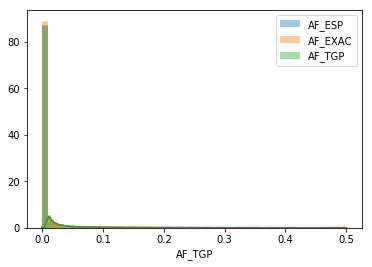

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(transformed_data.AF_ESP, label="AF_ESP")
sns.distplot(transformed_data.AF_EXAC, label="AF_EXAC")
sns.distplot(transformed_data.AF_TGP, label="AF_TGP")
plt.legend();

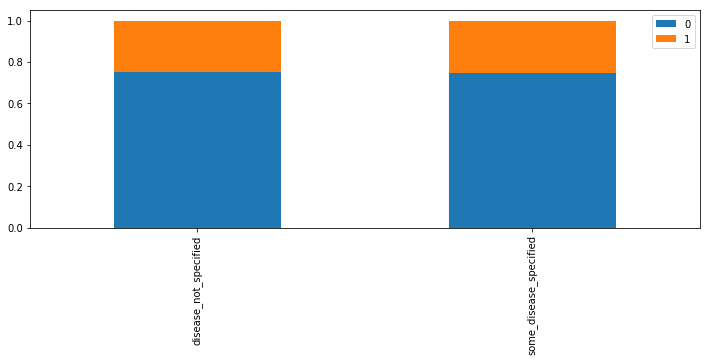

In [34]:
clndn = pd.concat([transformed_data.CLASS.loc[(transformed_data.CLNDN=='not_specified') | (transformed_data.CLNDN=='not_provided') | (transformed_data.CLNDN=='not_specified|not_provided')].value_counts(normalize=True).rename('disease_not_specified'), 
                       transformed_data.CLASS.loc[(transformed_data.CLNDN!='not_specified') | (transformed_data.CLNDN!='not_provided') | (transformed_data.CLNDN!='not_specified|not_provided')].value_counts(normalize=True).rename('some_disease_specified')], 
                      axis=1).T
clndn.plot.bar(stacked=True, figsize=(12, 4));

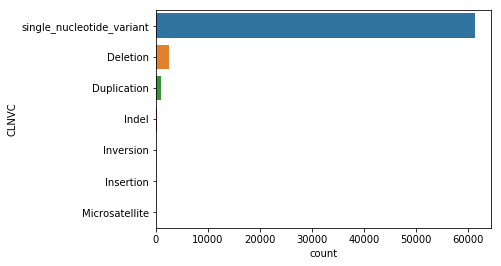

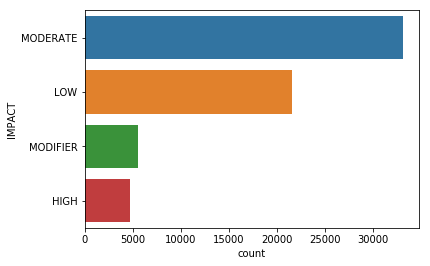

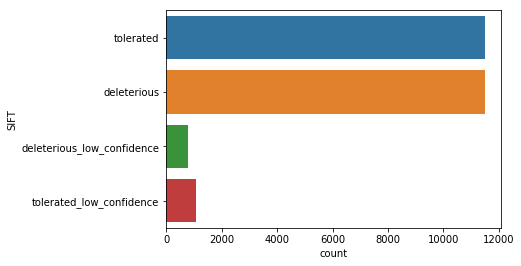

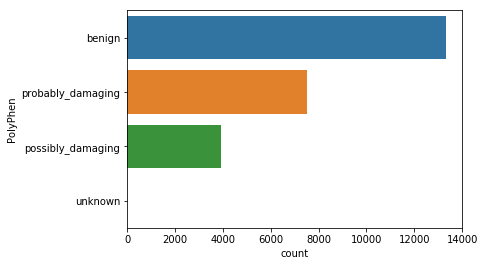

In [35]:
import seaborn as sns

attributes = ['CLNVC', 'IMPACT', 'SIFT', 'PolyPhen']

for attribute in attributes:
    sns.countplot(y=attribute, data=transformed_data)
    plt.show()

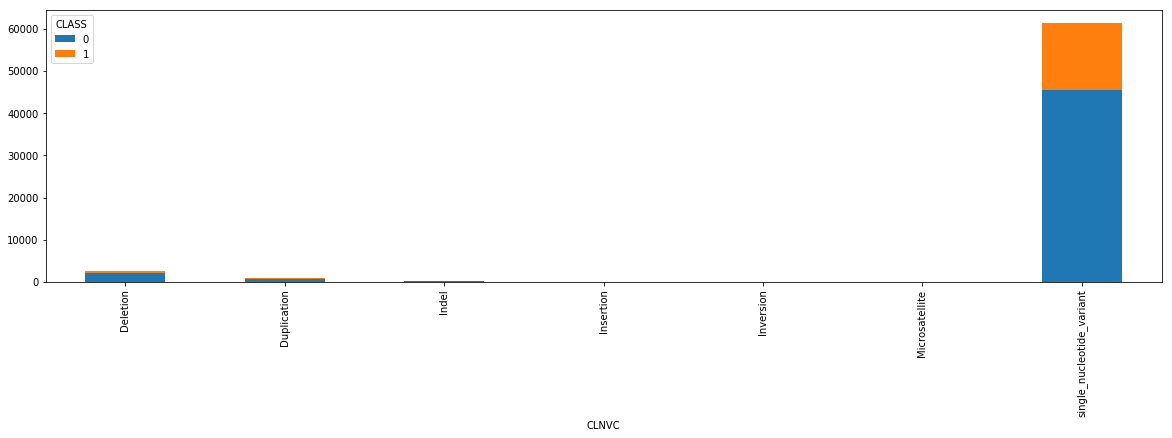

In [36]:
CLNVC = pd.crosstab(transformed_data['CLNVC'],transformed_data['CLASS'], margins=True)
CLNVC.drop('All', axis=0, inplace=True)
CLNVC.drop('All', axis=1, inplace=True)
CLNVC.plot.bar(stacked=True, figsize=(20, 5))

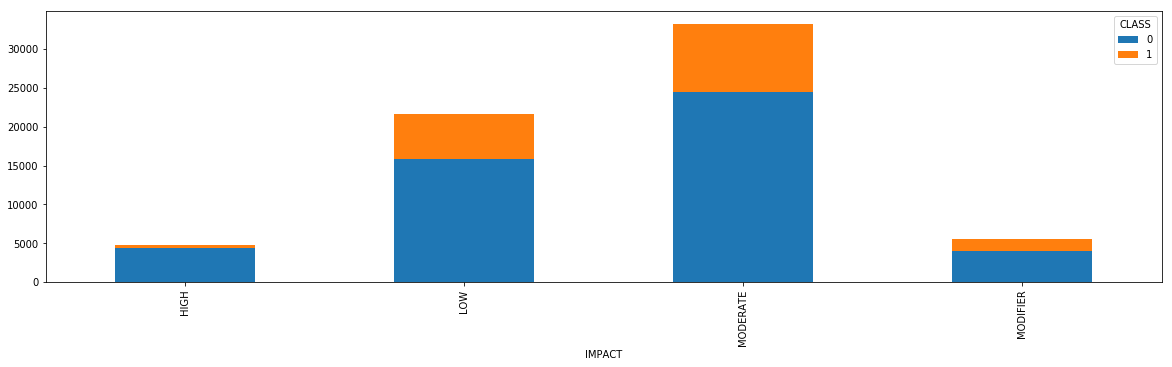

In [37]:
IMPACT = pd.crosstab(transformed_data['IMPACT'],transformed_data['CLASS'], margins=True)
IMPACT.drop('All', axis=0, inplace=True)
IMPACT.drop('All', axis=1, inplace=True)
IMPACT.plot.bar(stacked=True, figsize=(20, 5))

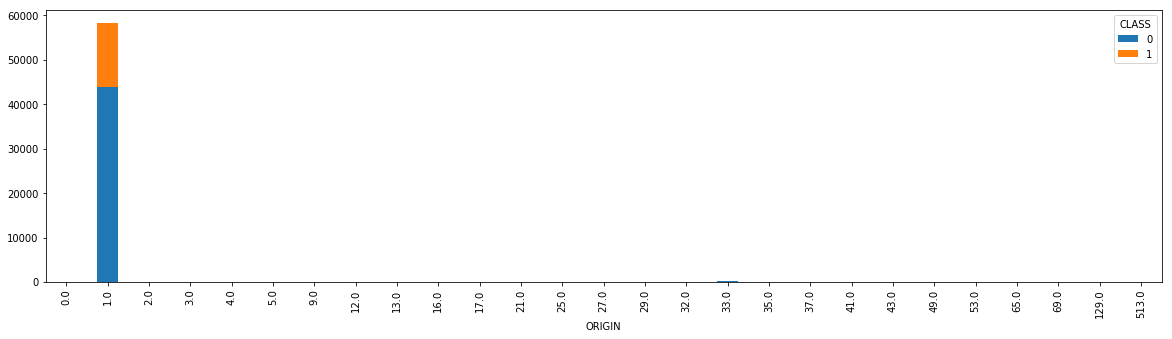

In [38]:
ORIGIN = pd.crosstab(transformed_data['ORIGIN'],transformed_data['CLASS'], margins=True)
ORIGIN.drop('All', axis=0, inplace=True)
ORIGIN.drop('All', axis=1, inplace=True)
ORIGIN.plot.bar(stacked=True, figsize=(20, 5))

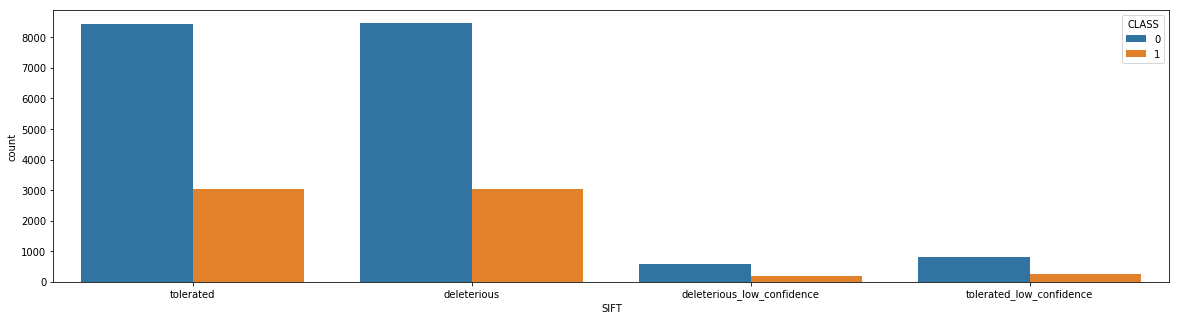

In [39]:
plt.figure(figsize=(20,5))
sns.countplot(x='SIFT',data=transformed_data,hue='CLASS')

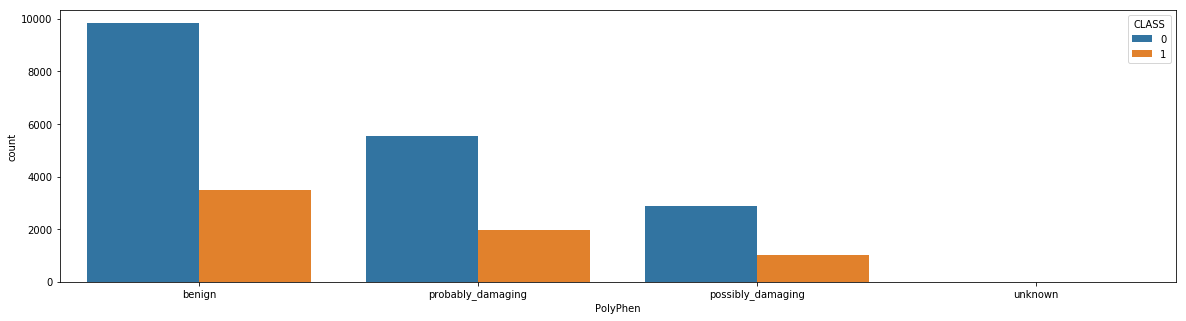

In [40]:
plt.figure(figsize=(20,5))
sns.countplot(x='PolyPhen',data=transformed_data,hue='CLASS')

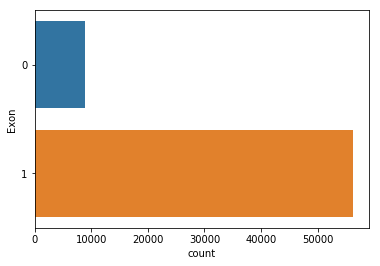

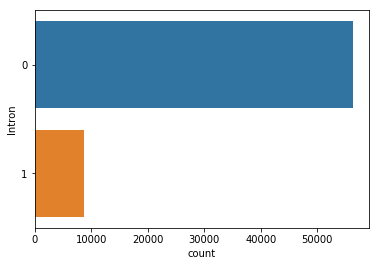

In [41]:
#Exon and Intron 
import seaborn as sns

attributes = ['Exon', 'Intron']

for attribute in attributes:
    sns.countplot(y=attribute, data=transformed_data)
    plt.show()

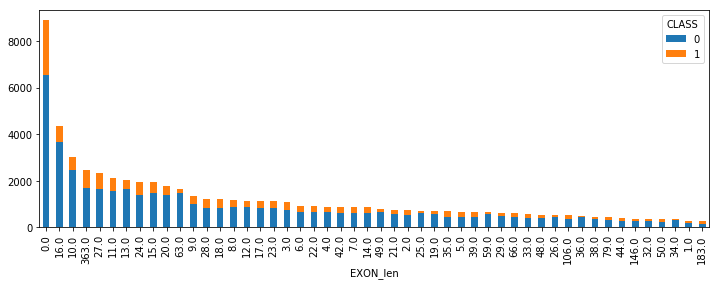

In [42]:
EXON_len = pd.crosstab(transformed_data.EXON_len, transformed_data.CLASS, margins=True)
EXON_len.drop('All', axis=0, inplace=True)
EXON_len= EXON_len.sort_values(by='All', ascending=False).head(50)
EXON_len.drop('All', axis=1, inplace=True)
EXON_len.plot.bar(stacked=True, figsize=(12, 4));

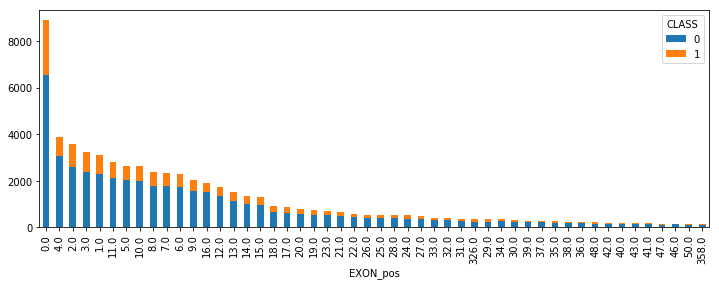

In [43]:
EXON_pos = pd.crosstab(transformed_data.EXON_pos, transformed_data.CLASS, margins=True)
EXON_pos.drop('All', axis=0, inplace=True)
EXON_pos= EXON_pos.sort_values(by='All', ascending=False).head(50)
EXON_pos.drop('All', axis=1, inplace=True)
EXON_pos.plot.bar(stacked=True, figsize=(12, 4));

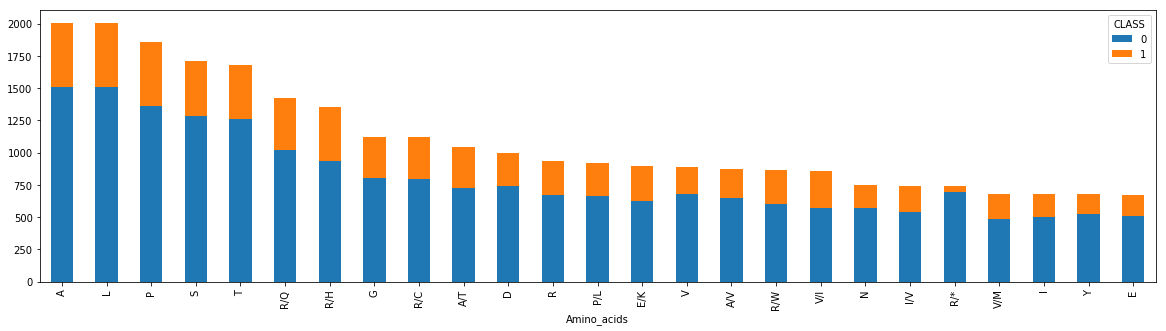

In [44]:
#Amino_acids
Amino_acids = pd.crosstab(transformed_data['Amino_acids'], transformed_data['CLASS'], margins=True)
Amino_acids.drop('All', axis=0, inplace=True)
Amino_acids = Amino_acids.sort_values(by='All', ascending=False).head(25)
Amino_acids.drop('All', axis=1, inplace=True)
Amino_acids.plot.bar(stacked=True, figsize=(20, 5))

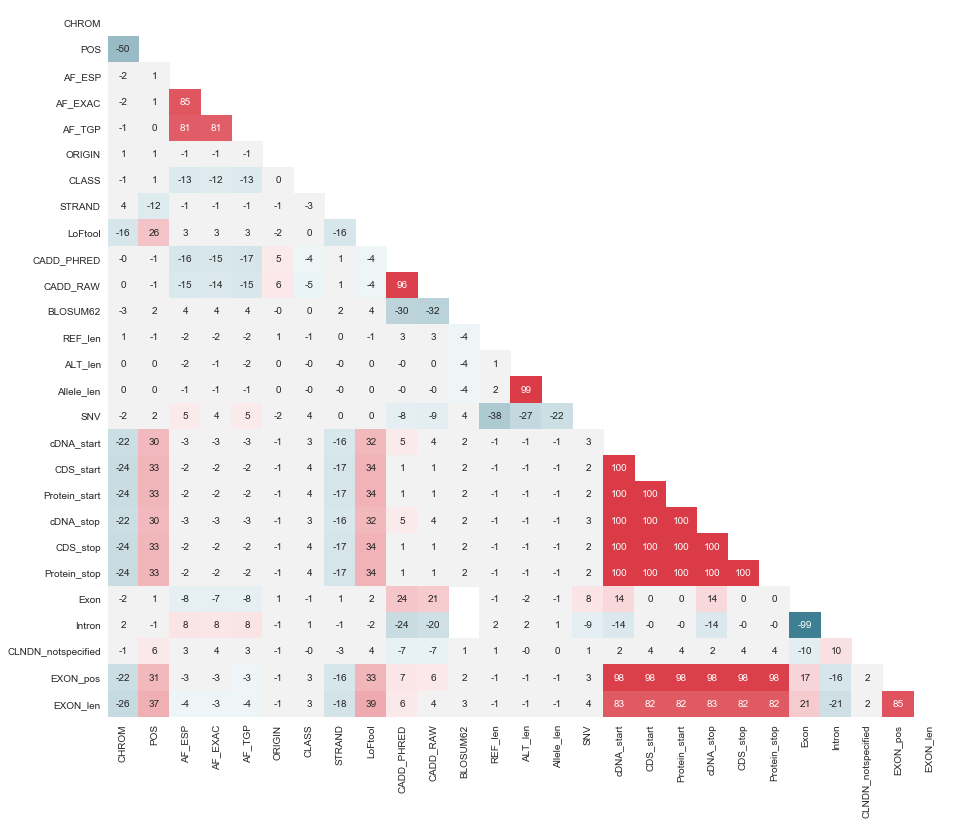

In [45]:
# Calculate correlations between numeric features
correlations = transformed_data.corr()

# Change color scheme
sns. set_style ("white")
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Make the figsize 20 x 20
plt.figure(figsize=(15,13))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot heatmap of correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f', 
            mask=mask, cbar=False, cmap=cmap)

plt.show()

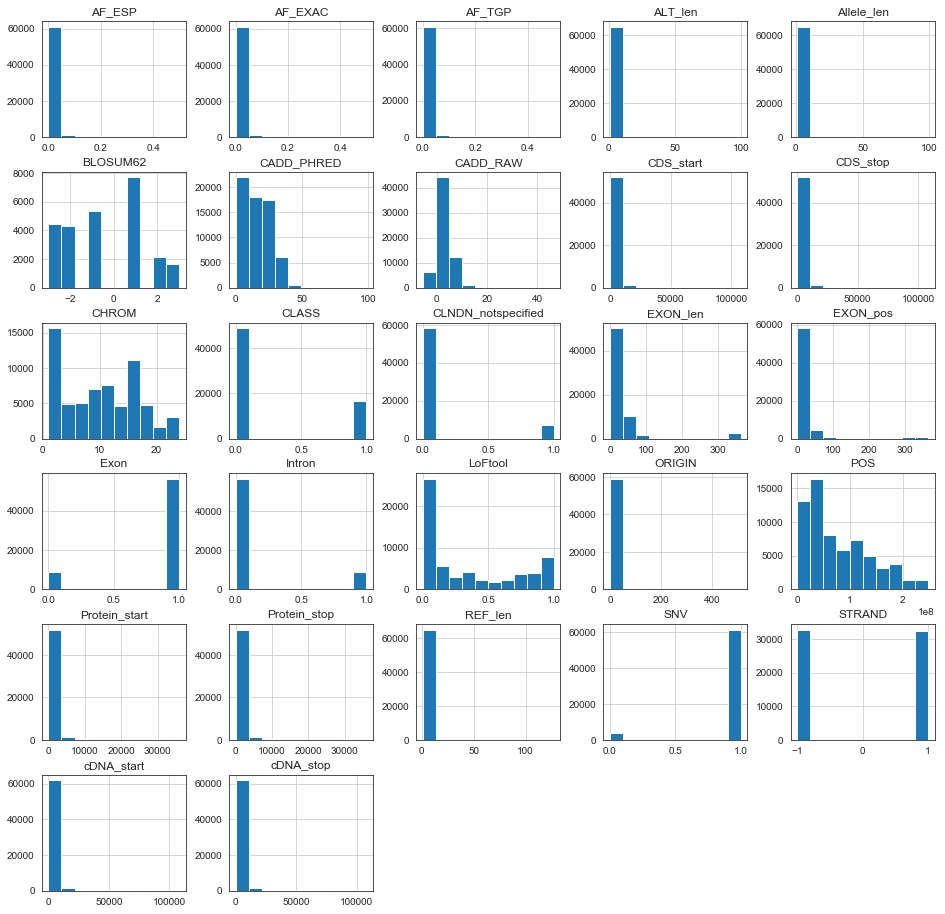

In [46]:
#CO_RELATION
import matplotlib.pyplot as plt

transformed_data.hist(figsize=(16,16))
plt.show()

In [47]:
correlations = transformed_data.corr()
correlations = correlations.abs().unstack() # Absolute value of corr coef
correlations = correlations.sort_values(ascending=False)
correlations = correlations[correlations >= 0.25]
correlations = correlations[correlations < 1]
correlations = pd.DataFrame(correlations).reset_index()
correlations.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlations.head()

,Feature 1,Feature 2,Correlation
0,CDS_stop,Protein_stop,1.0
1,Protein_stop,CDS_stop,1.0
2,CDS_start,Protein_start,1.0
3,Protein_start,CDS_start,1.0
4,CDS_stop,CDS_start,1.0


0    48754
1    16434
Name: CLASS, dtype: int64


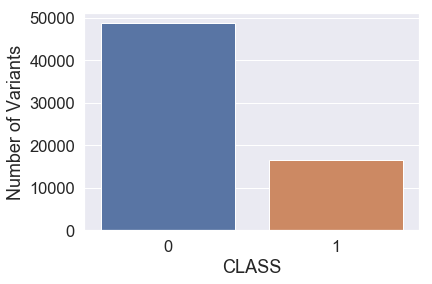

In [48]:
#check whether target variable is balanced.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style='whitegrid')
sns.set(font_scale=1.5);
print(transformed_data.CLASS.value_counts())
target_var = sns.countplot(x="CLASS", data=data)
target_var.set(xlabel='CLASS', ylabel='Number of Variants');

In [49]:
##SPLITTING THE DATASET INTO TRAIN,VALIDATION AND TEST
from sklearn.model_selection import train_test_split

X = transformed_data[numeric_features + categorical_features]
y = transformed_data.CLASS

def train_value_test_split(X, y):
    X_train,X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=111, stratify=y)
    X_test, X_val, y_test, y_val =train_test_split(X_temp, y_temp, test_size=0.5, random_state=111, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_value_test_split(X, y)

C:\Users\Ashley\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [50]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(45631, 33)
(9779, 33)
(9778, 33)


('1/0 CLASS ratio:', 0.5028045280379959)


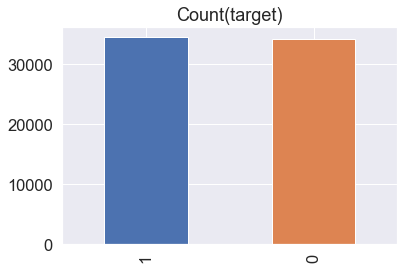

In [51]:
##BALANCING THE TRAINING SET
def balancing_training_set(X_train, y_train):
    X_temp = pd.concat([X_train, y_train], axis=1)
    balance = pd.concat([X_temp, X_temp[X_temp.CLASS == 1], X_temp[X_temp.CLASS == 1]])
    return balance.drop('CLASS', axis=1), balance['CLASS']

X_train_balance , y_train_balance = balancing_training_set(X_train, y_train)
y_train_balance.value_counts().plot(kind='bar',title='Count(target)')
print('1/0 CLASS ratio:', sum((y_train_balance == 1).astype(float)) / len(y_train_balance))

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown
     
    def fit(self, X, y=None):
   
         if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

         if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

         if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

         X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
         n_samples, n_features = X.shape
         self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

         for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

         self.categories_ = [le.classes_ for le in self._label_encoders_]

         return self

     
    def transform(self, X):
   
      X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
      n_samples, n_features = X.shape
      X_int = np.zeros_like(X, dtype=np.int)
      X_mask = np.ones_like(X, dtype=np.bool)


      for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])
            
            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
            else:
                X_mask[:, i] = valid_mask
                X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])
            
            if self.encoding == 'ordinal':
               return X_int.astype(self.dtype, copy=False)
        
            mask = X_mask.ravel()
            n_values = [cats.shape[0] for cats in self.categories_]
            n_values = np.array([0] + n_values)
            indices = np.cumsum(n_values)

            column_indices = (X_int + indices[:-1]).ravel()[mask]
            row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
            df = np.ones(n_samples * n_features)[mask]
            out = sparse.csc_matrix((df, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
            if self.encoding == 'onehot-dense':
                return out.toarray()
            else:
                return out

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

class EncodeNonNumericValues(BaseEstimator, TransformerMixin):
    def __init__(self, consequence_list):
        self.comment_ = 'Get feature matrix from Consequence and use CategoricalEncoder for the rest'
        self.consequence_list = consequence_list
    
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        consequene_vectorizer = CountVectorizer(binary=True, vocabulary=self.consequence_list)
        consequene_matrix = consequene_vectorizer.fit_transform(X_copy['Consequence'])
        
        consequence_data = pd.DataFrame(consequene_matrix.toarray(), columns=consequene_vectorizer.get_feature_names())
 
        
        categorical_encoder = CategoricalEncoder(encoding='onehot-dense')
        ordinal_encoder = CategoricalEncoder(encoding='ordinal')
        
        impact_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_copy.IMPACT.values.reshape(-1, 1)))
        SYMBOL_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X_copy.IMPACT.values.reshape(-1, 1)))

        X_copy = categorical_encoder.fit_transform(X_copy.drop(['Consequence', 'IMPACT'], axis=1))
        
        return pd.concat([pd.DataFrame(X_copy), consequence_data, impact_encoded], axis=1)

In [60]:
class CategoricalValues(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.comment_ = 'categorical imputer'
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        
        X_copy['Bam_edit_null'] = X_copy.BAM_EDIT.isnull()
        X_copy['Sift_null'] = X_copy.SIFT.isnull()
        X_copy['PolyPhen_null'] = X_copy.PolyPhen.isnull()
        X_copy['BLOSUM62_null'] = X_copy.BLOSUM62.isnull()
        X_copy['Codons'] = X_copy.Codons.isnull()
        X_copy['Amino_acids'] = X_copy.Amino_acids.isnull()
        
        X_copy.STRAND.fillna(-1, inplace=True)
        
        X_copy.BAM_EDIT.fillna('Unknown', inplace=True)
        
        X_copy.SIFT.fillna('Unknown', inplace=True)
        
        X_copy.PolyPhen.fillna('Unknown', inplace=True)
        
        X_copy.BLOSUM62.fillna('Unknown', inplace=True)
        X_copy.BLOSUM62 = X_copy.BLOSUM62.astype(str)
         
        X_copy.Codons.fillna('Unknown', inplace=True)
        X_copy.Amino_acids.fillna('Unknown', inplace=True)

        
        return X_copy

In [61]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names]

In [62]:
#Final Preprocessing Pipeline:
categorical_pipeline = Pipeline([
    ('selector', FeatureSelection(categorical_features)),
    ('impute_categoricalvalues', CategoricalValues()),
    ('categorical_encoder', EncodeNonNumericValues(transformed_data.Consequence.unique()))
])

In [63]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([
    ('selector', FeatureSelection(numeric_features)),
    ('impute_numericalvalues', Imputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [64]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('categorical_pipeline', categorical_pipeline),
    ('numeric_pipeline', numeric_pipeline)
])

In [65]:
X_train_prep = full_pipeline.fit_transform(X_train_balance)
X_val_prep = full_pipeline.transform(X_val)
X_test_prep = full_pipeline.transform(X_test)

In [66]:
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)

(68639L, 136L)
(9779L, 136L)
(9778L, 136L)


In [67]:
class AttributeSelection(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names]

In [68]:
# Define function to plot ROC-Curves
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    fig = plt.figure(figsize=(8,8))
    plt.title('Receiver Operating Characteristic')

    plt.plot(fpr, tpr, label='l1')
    plt.legend('lower right')

    plt.plot([0, 1], [0, 1], 'k--')

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    print('Area Under the Curve:', auc(fpr, tpr))

In [69]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [70]:
from sklearn.metrics import *

In [72]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel

pipelines = {
    'rf': make_pipeline(SelectFromModel(RandomForestClassifier(random_state=42)), RandomForestClassifier(random_state=42)),
    'gb': make_pipeline(SelectFromModel(GradientBoostingClassifier(random_state=42)), GradientBoostingClassifier(random_state=42)),
    'decision_tree': make_pipeline(SelectFromModel(DecisionTreeClassifier(random_state=42)), DecisionTreeClassifier(random_state=42))

}

In [73]:
rf_hyperparameters = {
    'randomforestclassifier__bootstrap': [True],
    'randomforestclassifier__max_depth': [7,8],
    'randomforestclassifier__max_features': [7,8],
    'randomforestclassifier__min_samples_leaf': [6,7],
    'randomforestclassifier__min_samples_split': [10,12],
    'randomforestclassifier__n_estimators': [100]
}     

gb_hyperparameters = {
    'gradientboostingclassifier__max_depth': [7,8],
    'gradientboostingclassifier__max_features': [7,8],
    'gradientboostingclassifier__min_samples_leaf': [6,7],
    'gradientboostingclassifier__min_samples_split': [10,12],
    'gradientboostingclassifier__n_estimators': [100]
}


decision_tree_hyperparameters = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [7,8,9],
    'decisiontreeclassifier__max_features': [7,8,9]
}
                   


In [74]:
hyperparameters = {
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters,
    'decision_tree': decision_tree_hyperparameters,
}

In [75]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

fitted_models = {}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=cv, scoring='roc_auc', 
                         verbose=50, n_jobs=-1)
    model.fit(X_train_prep, y_train_balance)
    
    fitted_models[name] = model
    print(name, 'has been fitted.')

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   20.3s
[Parall

[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  2.7min
[Paralle

[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed: 13.4min
[Paralle

[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed: 40.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 40.4min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed: 42.7min
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done  79 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed: 47.4min
[Paralle

In [76]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

('decision_tree', 0.7625994199730425)
('rf', 0.777778425905581)
('gb', 0.8440714334020489)


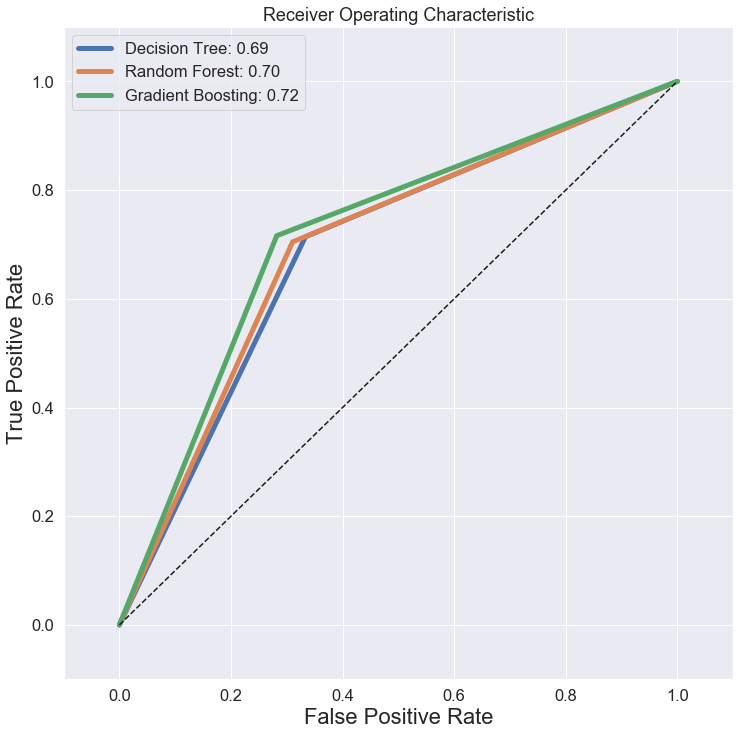

In [77]:
fig = plt.figure(figsize=(12,12))
model_list = {'rf': 'Random Forest', 'gb': 'Gradient Boosting', 'decision_tree': 'Decision Tree',}

for name, model in fitted_models.items():
    y_pred = fitted_models[name].best_estimator_.predict(X_val_prep)
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s: %0.2f' % (model_list[name], roc_auc), linewidth=5)
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', fontsize=22)
plt.ylabel('True Positive Rate', fontsize=22)
plt.legend(loc=2)

plt.savefig('roc_curves.jpg')
plt.show()

In [78]:
from sklearn.metrics import accuracy_score

for name, model in fitted_models.items():
    y_pred = fitted_models[name].best_estimator_.predict(X_val_prep)
    print(name, '\n', classification_report(y_val, y_pred))
    print(accuracy_score(y_val, y_pred))

('decision_tree', '\n', u'             precision    recall  f1-score   support\n\n          0       0.87      0.67      0.76      7314\n          1       0.42      0.71      0.53      2465\n\navg / total       0.76      0.68      0.70      9779\n')
0.6784947336128438
('rf', '\n', u'             precision    recall  f1-score   support\n\n          0       0.87      0.69      0.77      7314\n          1       0.43      0.70      0.54      2465\n\navg / total       0.76      0.69      0.71      9779\n')
0.6933224256058902
('gb', '\n', u'             precision    recall  f1-score   support\n\n          0       0.88      0.72      0.79      7314\n          1       0.46      0.72      0.56      2465\n\navg / total       0.78      0.72      0.73      9779\n')
0.7174557725738828


In [79]:
X_final_train = np.concatenate((X_train_prep, X_val_prep), axis=0)
y_final_train = pd.concat([y_train_balance, y_val], axis=0)
print(X_final_train.shape)
print(y_final_train.shape)

(78418L, 136L)
(78418L,)


In [86]:
fitted_models['gb'].best_params_

{'gradientboostingclassifier__max_depth': 8,
 'gradientboostingclassifier__max_features': 8,
 'gradientboostingclassifier__min_samples_leaf': 6,
 'gradientboostingclassifier__min_samples_split': 10,
 'gradientboostingclassifier__n_estimators': 100}

In [87]:
best_gb_params = {'gradientboostingclassifier__max_depth': [8],
                  'gradientboostingclassifier__max_features': [8],
                  'gradientboostingclassifier__min_samples_leaf': [6],
                  'gradientboostingclassifier__min_samples_split': [10],
                  'gradientboostingclassifier__n_estimators': [100]
                 }

final_gb_pipeline = make_pipeline(SelectFromModel(GradientBoostingClassifier()), 
                                  GradientBoostingClassifier(random_state=42))

best_gb = GridSearchCV(final_gb_pipeline, best_gb_params, cv=cv, scoring='roc_auc', 
                         verbose=50, n_jobs=-1)
best_gb.fit(X_train_prep, y_train_balance)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:  2.7min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:  5.2min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  5.2min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  5.2min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:  5.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('selectfrommodel', SelectFromModel(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
...        presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'gradientboostingclassifier__min_samples_leaf': [6], 'gradientboostingclassifier__max_features': [8], 'gradientboostingclassifier__n_estimators': [100], 'gradientboostingclassifier__min_samples_split': [10], 'gradientboostingclassifier__max_depth': [8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=50)

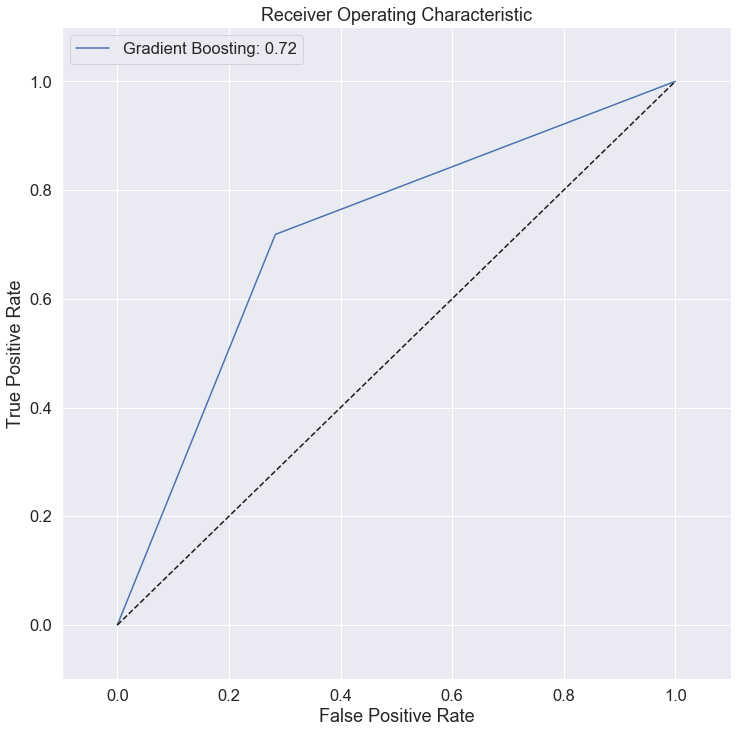

In [88]:
fig = plt.figure(figsize=(12,12))

y_pred = best_gb.predict(X_test_prep)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Gradient Boosting: %0.2f' % (roc_auc))
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=2)

plt.show()

In [89]:
y_pred_test = best_gb.predict(X_test_prep)
print(name, '\n', classification_report(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))

('gb', '\n', u'             precision    recall  f1-score   support\n\n          0       0.88      0.72      0.79      7313\n          1       0.46      0.72      0.56      2465\n\navg / total       0.78      0.72      0.73      9778\n')
0.7172223358560033


In [91]:
print(confusion_matrix(y_test, y_pred_test))

[[5242 2071]
 [ 694 1771]]


In [92]:
print(y_pred_test)

[0 1 1 ... 1 0 1]
